In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl


In [3]:
column_names = ['epoch', 't', 'mse', 'l2']

In [4]:
data = []
with open('/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep500_m12_w128train.txt', 'r') as file:
    for line in file:
        match = re.match(r'epoch (\d+): t=(\d+\.\d+), train_mse=(\d+\.\d+e[+-]\d+), train_l2=(\d+\.\d+e[+-]\d+)', line)
        if match:
            epoch = int(match.group(1))
            t = float(match.group(2))
            train_mse = float(match.group(3))
            train_l2 = float(match.group(4))
            data.append([epoch, t, train_mse, train_l2])
train_df = pd.DataFrame(data, columns=['Epoch', 'Time', 'Train MSE', 'Train L2']) 

In [5]:
train_df

,Epoch,Time,Train MSE,Train L2
0,0,1061.750,1.060000,0.391800
1,1,994.057,0.642600,0.305200
2,2,998.183,0.283400,0.184900
3,3,1024.120,0.177000,0.140900
4,4,1038.069,0.145300,0.127800
...,...,...,...,...
339,339,2533.519,0.000176,0.004419
340,340,1970.747,0.000189,0.004607
341,341,1543.365,0.000169,0.004393
342,342,2441.523,0.000184,0.004633


In [19]:
data = []
with open('/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep500_m12_w128test.txt', 'r') as file:
    for line in file:
        match = re.match(r'epoch (\d+): t=(\d+\.\d+), test_mse=(\d+\.\d+e[+-]\d+), test_l2=(\d+\.\d+e[+-]\d+)', line)
        if match:
            epoch = int(match.group(1))
            t = float(match.group(2))
            test_mse = float(match.group(3))
            test_l2 = float(match.group(4))
            data.append([epoch, t, test_mse, test_l2])
test_df = pd.DataFrame(data, columns=['Epoch', 'Time', 'Test MSE', 'Test L2'])

In [6]:
test_df

NameError: name 'test_df' is not defined

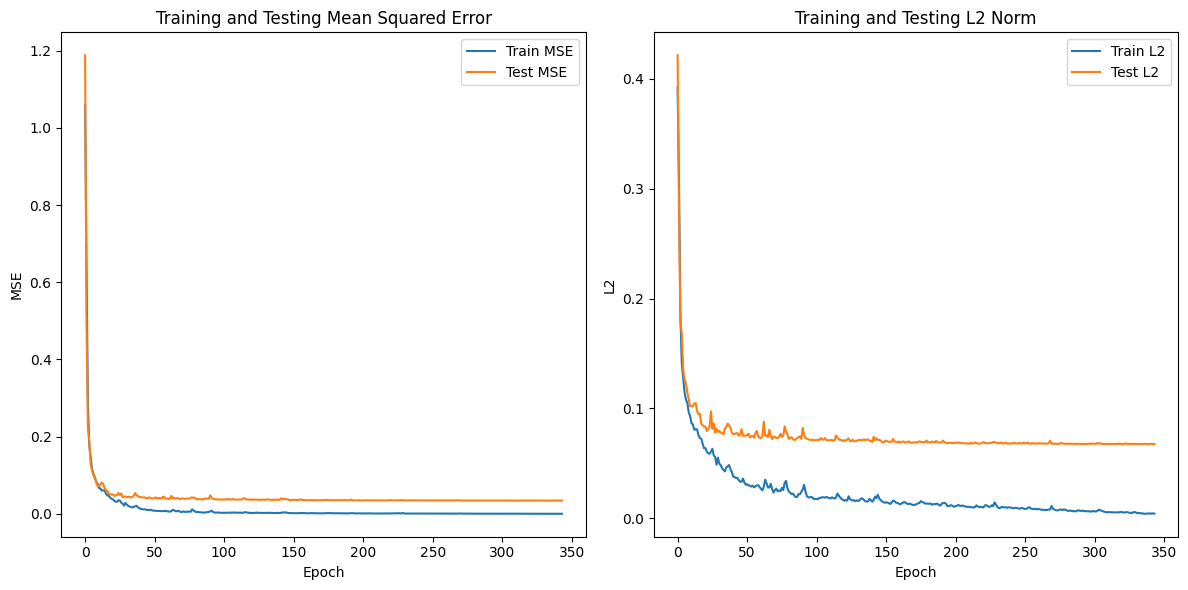

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re

def analyze_performance(train_file_path, test_file_path):
    # Read and process training data
    train_data = []
    with open(train_file_path, 'r') as file:
        for line in file:
            match = re.match(r'epoch (\d+): t=(\d+\.\d+), train_mse=(\d+\.\d+e[+-]\d+), train_l2=(\d+\.\d+e[+-]\d+)', line)
            if match:
                epoch = int(match.group(1))
                t = float(match.group(2))
                train_mse = float(match.group(3))
                train_l2 = float(match.group(4))
                train_data.append([epoch, t, train_mse, train_l2])
    train_df = pd.DataFrame(train_data, columns=['Epoch', 'Time', 'Train MSE', 'Train L2'])
    
    # Read and process testing data
    test_data = []
    with open(test_file_path, 'r') as file:
        for line in file:
            match = re.match(r'epoch (\d+): t=(\d+\.\d+), test_mse=(\d+\.\d+e[+-]\d+), test_l2=(\d+\.\d+e[+-]\d+)', line)
            if match:
                epoch = int(match.group(1))
                t = float(match.group(2))
                test_mse = float(match.group(3))
                test_l2 = float(match.group(4))
                test_data.append([epoch, t, test_mse, test_l2])
    test_df = pd.DataFrame(test_data, columns=['Epoch', 'Time', 'Test MSE', 'Test L2'])
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Training MSE plot
    plt.subplot(1, 2, 1)
    plt.plot(train_df['Epoch'], train_df['Train MSE'], label='Train MSE')
    plt.plot(test_df['Epoch'], test_df['Test MSE'], label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Training and Testing Mean Squared Error')
    plt.legend()
    
    # Training L2 plot
    plt.subplot(1, 2, 2)
    plt.plot(train_df['Epoch'], train_df['Train L2'], label='Train L2')
    plt.plot(test_df['Epoch'], test_df['Test L2'], label='Test L2')
    plt.xlabel('Epoch')
    plt.ylabel('L2')
    plt.title('Training and Testing L2 Norm')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function with the file paths
train_file_path = '/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep500_m12_w128train.txt'
test_file_path = '/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep500_m12_w128test.txt'
analyze_performance(train_file_path, test_file_path)


In [3]:
from utilities import *
from timeit import default_timer



/home/smrserraoseabr/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
folder = "/scratch/smrserraoseabr/Projects/FluvialCO2/results32/"
input_vars = ['Por', 'Perm', 'gas_rate'] # Porosity, Permeability, ,  Well 'gas_rate', Pressure + x, y, time encodings 
output_vars = ['CO_2']
device = 'cpu'
num_files= 1000
traintest_split = 0.8
dataset = ReadXarrayDataset(folder=folder, input_vars=input_vars, output_vars=output_vars, num_files = num_files, traintest_split = traintest_split)



# Get input and output data tensors
train_a = dataset.train_data_input
train_u = dataset.train_data_output

test_a = dataset.test_data_input
test_u = dataset.test_data_output

# Move data tensors to GPU if available
train_a = train_a.to(device)
train_u = train_u.to(device)

test_a = test_a.to(device)
test_u = test_u.to(device)

# Normalize input_data and output_data
a_normalizer = UnitGaussianNormalizer(train_a)
train_a= a_normalizer.encode(train_a)
test_a = a_normalizer.encode(test_a)

y_normalizer = UnitGaussianNormalizer(train_u)
train_u = y_normalizer.encode(train_u)
test_u = y_normalizer.encode(test_u)

#print shapes of normalized input and output data tensors
print("Train input data shape:", train_a.shape)
print("Train output data shape:", train_u.shape)
print("Test input data shape:", test_a.shape)
print("Test output data shape:", test_u.shape)


Train input data shape: torch.Size([800, 61, 32, 32, 6])
Train output data shape: torch.Size([800, 61, 32, 32, 1])
Test input data shape: torch.Size([200, 61, 32, 32, 6])
Test output data shape: torch.Size([200, 61, 32, 32, 1])


In [7]:
#%%
"""
Adapted from Zongyi Li TODO: include referene in the README
This file is the Fourier Neural Operator for 3D problem takes the 2D spatial + 1D temporal equation directly as a 3D problem
"""

import torch.nn.functional as F
from utilities import *
from timeit import default_timer

torch.manual_seed(0)
np.random.seed(0)
#%%
################################################################
# 3d fourier layers
################################################################

class SpectralConv3d(nn.Module):
    def __init__(self, in_channels, out_channels, modes1, modes2, modes3):
        super(SpectralConv3d, self).__init__()

        """
        3D Fourier layer. It does FFT, linear transform, and Inverse FFT.    
        """

        self.in_channels = in_channels
        self.out_channels = out_channels
        self.modes1 = modes1 #Number of Fourier modes to multiply, at most floor(N/2) + 1
        self.modes2 = modes2
        self.modes3 = modes3

        self.scale = (1 / (in_channels * out_channels))
        self.weights1 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, self.modes3, dtype=torch.cfloat))
        self.weights2 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, self.modes3, dtype=torch.cfloat))
        self.weights3 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, self.modes3, dtype=torch.cfloat))
        self.weights4 = nn.Parameter(self.scale * torch.rand(in_channels, out_channels, self.modes1, self.modes2, self.modes3, dtype=torch.cfloat))

    # Complex multiplication
    def compl_mul3d(self, input, weights):
        # (batch, in_channel, x,y,t ), (in_channel, out_channel, x,y,t) -> (batch, out_channel, x,y,t)
        return torch.einsum("bixyz,ioxyz->boxyz", input, weights)

    def forward(self, x):
        batchsize = x.shape[0]
        #Compute Fourier coeffcients up to factor of e^(- something constant)
        x_ft = torch.fft.rfftn(x, dim=[-3,-2,-1])

        # Multiply relevant Fourier modes
        out_ft = torch.zeros(batchsize, self.out_channels, x.size(-3), x.size(-2), x.size(-1)//2 + 1, dtype=torch.cfloat, device=x.device)
        out_ft[:, :, :self.modes1, :self.modes2, :self.modes3] = \
            self.compl_mul3d(x_ft[:, :, :self.modes1, :self.modes2, :self.modes3], self.weights1)
        out_ft[:, :, -self.modes1:, :self.modes2, :self.modes3] = \
            self.compl_mul3d(x_ft[:, :, -self.modes1:, :self.modes2, :self.modes3], self.weights2)
        out_ft[:, :, :self.modes1, -self.modes2:, :self.modes3] = \
            self.compl_mul3d(x_ft[:, :, :self.modes1, -self.modes2:, :self.modes3], self.weights3)
        out_ft[:, :, -self.modes1:, -self.modes2:, :self.modes3] = \
            self.compl_mul3d(x_ft[:, :, -self.modes1:, -self.modes2:, :self.modes3], self.weights4)

        #Return to physical space
        x = torch.fft.irfftn(out_ft, s=(x.size(-3), x.size(-2), x.size(-1)))
        return x

class MLP(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels):
        super(MLP, self).__init__()
        self.mlp1 = nn.Conv3d(in_channels, mid_channels, 1)
        self.mlp2 = nn.Conv3d(mid_channels, out_channels, 1)

    def forward(self, x):
        x = self.mlp1(x)
        x = F.gelu(x)
        x = self.mlp2(x)
        return x

class FNO3d(nn.Module):
    def __init__(self, modes1, modes2, modes3, width):
        super(FNO3d, self).__init__()

        """
        The overall network. It contains 4 layers of the Fourier layer.
        1. Lift the input to the desire channel dimension by self.fc0 .
        2. 4 layers of the integral operators u' = (W + K)(u).
            W defined by self.w; K defined by self.conv .
        3. Project from the channel space to the output space by self.fc1 and self.fc2 .
        
        input: all parameters  + encoded spatial-temporal locations (x, y, t)
        input shape: (batchsize, x=32, y=32, t=61, c=6)
        output: the solution of the 61 timesteps
        output shape: (batchsize, x=32, y=32, t=61, c=1)
        """

        self.modes1 = modes1
        self.modes2 = modes2
        self.modes3 = modes3
        self.width = width
        self.padding = 1 # pad the domain if input is non-periodic

        self.p = nn.Linear(6, self.width)# input channel is 6: Por, Perm, Pressure + x, y, time encodings
        self.conv0 = SpectralConv3d(self.width, self.width, self.modes1, self.modes2, self.modes3)
        self.conv1 = SpectralConv3d(self.width, self.width, self.modes1, self.modes2, self.modes3)
        self.conv2 = SpectralConv3d(self.width, self.width, self.modes1, self.modes2, self.modes3)
        self.conv3 = SpectralConv3d(self.width, self.width, self.modes1, self.modes2, self.modes3)
        self.mlp0 = MLP(self.width, self.width, self.width)
        self.mlp1 = MLP(self.width, self.width, self.width)
        self.mlp2 = MLP(self.width, self.width, self.width)
        self.mlp3 = MLP(self.width, self.width, self.width)
        self.w0 = nn.Conv3d(self.width, self.width, 1)
        self.w1 = nn.Conv3d(self.width, self.width, 1)
        self.w2 = nn.Conv3d(self.width, self.width, 1)
        self.w3 = nn.Conv3d(self.width, self.width, 1)
        self.q = MLP(self.width, 1, self.width * 4) # output channel is 1: u(x, y)

    def forward(self, x):
        #grid = self.get_grid(x.shape, x.device)
        #print(f'grid shape: {grid.shape}')
        #print(f'x shape: {x.shape}')
        #x = torch.cat((x, grid), dim=-1)
        #print(f'x shape after cat: {x.shape}')
        x = self.p(x)
        x = x.permute(0, 4, 1, 2, 3)
        x = F.pad(x, [0,self.padding]) # pad the domain if input is non-periodic

        x1 = self.conv0(x)
        x1 = self.mlp0(x1)
        x2 = self.w0(x)
        x = x1 + x2
        x = F.gelu(x)

        x1 = self.conv1(x)
        x1 = self.mlp1(x1)
        x2 = self.w1(x)
        x = x1 + x2
        x = F.gelu(x)

        x1 = self.conv2(x)
        x1 = self.mlp2(x1)
        x2 = self.w2(x)
        x = x1 + x2
        x = F.gelu(x)

        x1 = self.conv3(x)
        x1 = self.mlp3(x1)
        x2 = self.w3(x)
        x = x1 + x2

        x = x[..., :-self.padding]
        x = self.q(x)
        x = x.permute(0, 2, 3, 4, 1) # pad the domain if input is non-periodic
        return x
        
    def get_grid(self, shape, device):
        batchsize, size_x, size_y, size_z = shape[0], shape[1], shape[2], shape[3]
        gridx = torch.tensor(np.linspace(0, 1, size_x), dtype=torch.float)
        gridx = gridx.reshape(1, size_x, 1, 1, 1).repeat([batchsize, 1, size_y, size_z, 1])
        gridy = torch.tensor(np.linspace(0, 1, size_y), dtype=torch.float)
        gridy = gridy.reshape(1, 1, size_y, 1, 1).repeat([batchsize, size_x, 1, size_z, 1])
        gridz = torch.tensor(np.linspace(0, 1, size_z), dtype=torch.float)
        gridz = gridz.reshape(1, 1, 1, size_z, 1).repeat([batchsize, size_x, size_y, 1, 1])
        return torch.cat((gridx, gridy, gridz), dim=-1).to(device)
        
      


In [13]:
#modes = 12
#width = 128
path_model = '/scratch/smrserraoseabr/Projects/NO-DA/model_INPUT_POR_PERM_QG_OUTPUT_CO2/ns_fourier_3d_N800.0_ep300_m12_w128'

#model = FNO3d(modes, modes, modes, width).to(device)

model = torch.load(path_model)
model.eval()  # If you're doing evaluation

FNO3d(
  (p): Linear(in_features=6, out_features=128, bias=True)
  (conv0): SpectralConv3d()
  (conv1): SpectralConv3d()
  (conv2): SpectralConv3d()
  (conv3): SpectralConv3d()
  (mlp0): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp1): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp2): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp3): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (w0): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (w1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (w2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=

In [19]:
pred = torch.zeros(test_u.shape)
index = 0
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_a, test_u), batch_size=1, shuffle=False)


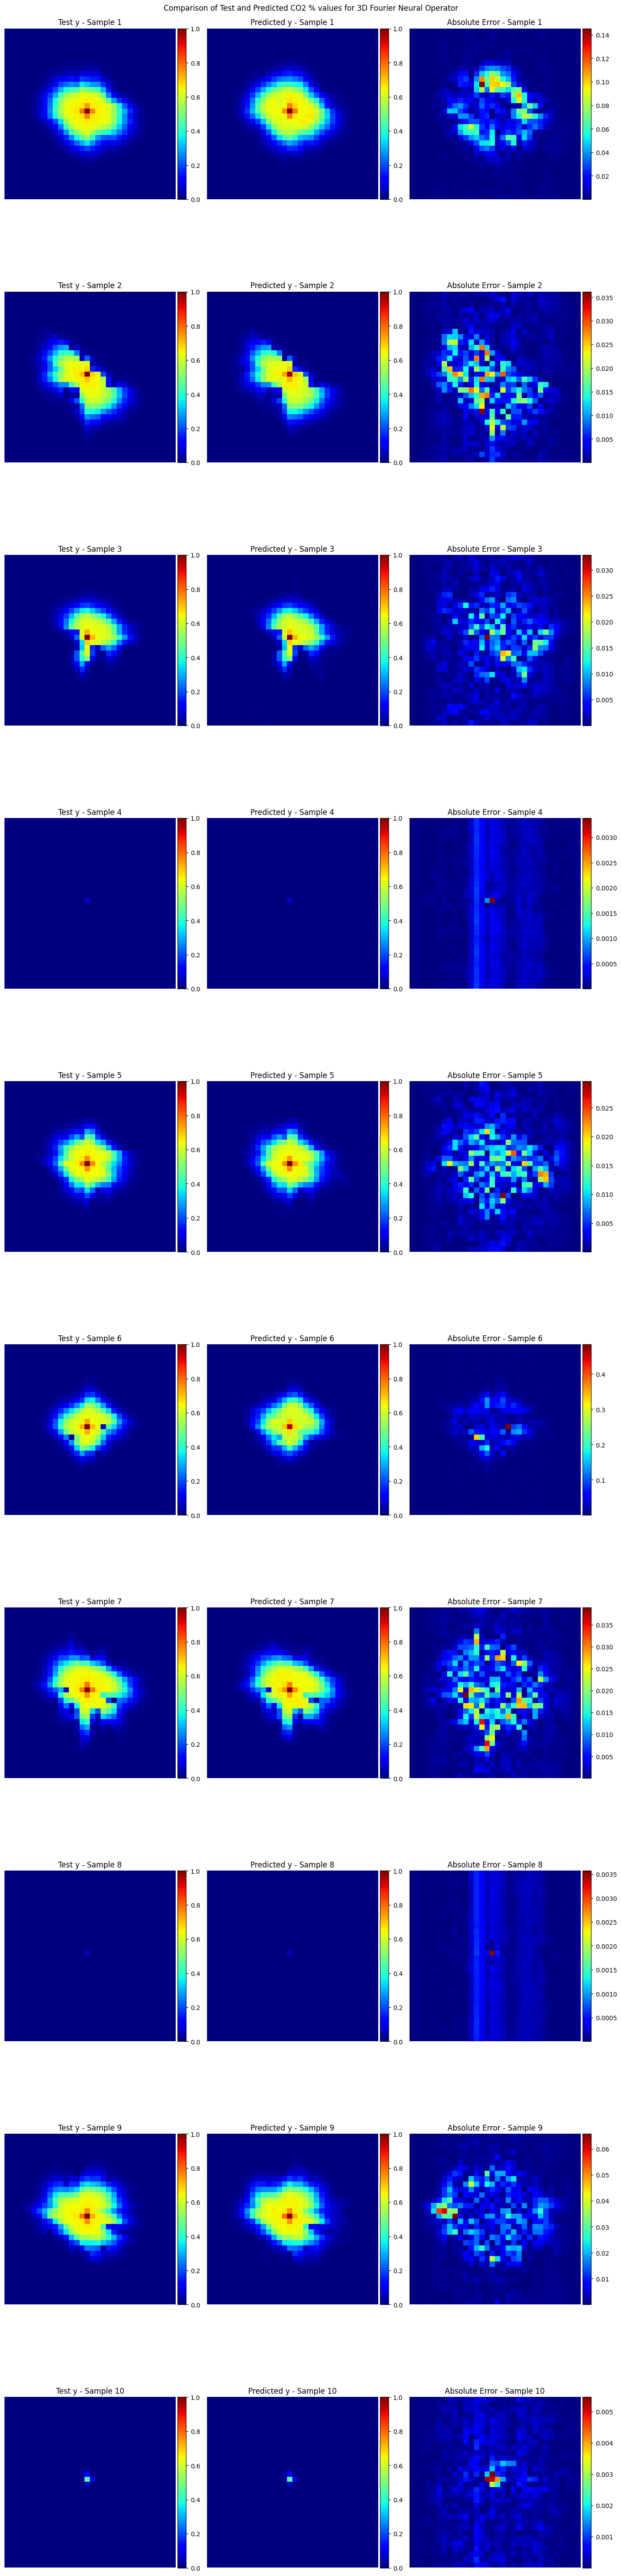

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

num_samples = 10  # Number of samples to iterate over

fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(14, 6*num_samples))

# Initialize color normalizer
vmin, vmax = 0.0, 1.0 # Define your min and max here
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
        # Assuming the tensor shapes are torch.Size([1, 30, 32, 32, 1]) and torch.Size([1, 61, 32, 32, 1])
        test_y_shape = (1, 61, 32, 32, 1)
        predicted_y_shape = (1, 61, 32, 32, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y and predicted y in the corresponding subplot
        img1 = axes[index, 0].imshow(test_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img2 = axes[index, 1].imshow(predicted_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img3 = axes[index, 2].imshow(np.abs(test_y[0, -1, :, :, 0] - predicted_y[0, -1, :, :, 0]), cmap='jet')

        for img, ax in zip([img1, img2], axes[index][:2]):
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(img, cax=cax, orientation='vertical')
            
        # Adding separate colorbar for the third column
        divider = make_axes_locatable(axes[index][2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img3, cax=cax, orientation='vertical')

        axes[index, 0].set_title(f'Test y - Sample {index+1}')
        axes[index, 1].set_title(f'Predicted y - Sample {index+1}')
        axes[index, 2].set_title(f'Absolute Error - Sample {index+1}')

        # Removing the axis labels
        for ax in axes[index]:
            ax.axis('off')

# Adding a title for the entire figure
fig.suptitle('Comparison of Test and Predicted CO2 % values for 3D Fourier Neural Operator')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep300_m12_w128_INPUT_Por_Perm_gasrate_OUTPUT_CO2.png')


In [28]:
folder = "/scratch/smrserraoseabr/Projects/FluvialCO2/results32/"
input_vars = ['Por', 'Perm', 'gas_rate'] # Porosity, Permeability, ,  Well 'gas_rate', Pressure + x, y, time encodings 
output_vars = ['Pressure']
device = 'cpu'
num_files= 1000
traintest_split = 0.8
dataset = ReadXarrayDataset(folder=folder, input_vars=input_vars, output_vars=output_vars, num_files = num_files, traintest_split = traintest_split)



# Get input and output data tensors
train_a = dataset.train_data_input
train_u = dataset.train_data_output

test_a = dataset.test_data_input
test_u = dataset.test_data_output

# Move data tensors to GPU if available
train_a = train_a.to(device)
train_u = train_u.to(device)

test_a = test_a.to(device)
test_u = test_u.to(device)

# Normalize input_data and output_data
a_normalizer = UnitGaussianNormalizer(train_a)
train_a= a_normalizer.encode(train_a)
test_a = a_normalizer.encode(test_a)

y_normalizer = UnitGaussianNormalizer(train_u)
train_u = y_normalizer.encode(train_u)
test_u = y_normalizer.encode(test_u)

#print shapes of normalized input and output data tensors
print("Train input data shape:", train_a.shape)
print("Train output data shape:", train_u.shape)
print("Test input data shape:", test_a.shape)
print("Test output data shape:", test_u.shape)

Train input data shape: torch.Size([800, 61, 32, 32, 6])
Train output data shape: torch.Size([800, 61, 32, 32, 1])
Test input data shape: torch.Size([200, 61, 32, 32, 6])
Test output data shape: torch.Size([200, 61, 32, 32, 1])


In [29]:
#modes = 12
#width = 128
path_model = '/scratch/smrserraoseabr/Projects/NO-DA/model_INPUT_POR_PERM_QG_OUTPUT_Pressure/ns_fourier_3d_N800.0_ep500_m12_w128'

#model = FNO3d(modes, modes, modes, width).to(device)

model = torch.load(path_model)
model.eval()  # If you're doing evaluation

FNO3d(
  (p): Linear(in_features=6, out_features=128, bias=True)
  (conv0): SpectralConv3d()
  (conv1): SpectralConv3d()
  (conv2): SpectralConv3d()
  (conv3): SpectralConv3d()
  (mlp0): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp1): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp2): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp3): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (w0): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (w1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (w2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=

In [30]:
pred = torch.zeros(test_u.shape)
index = 0
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_a, test_u), batch_size=1, shuffle=False)

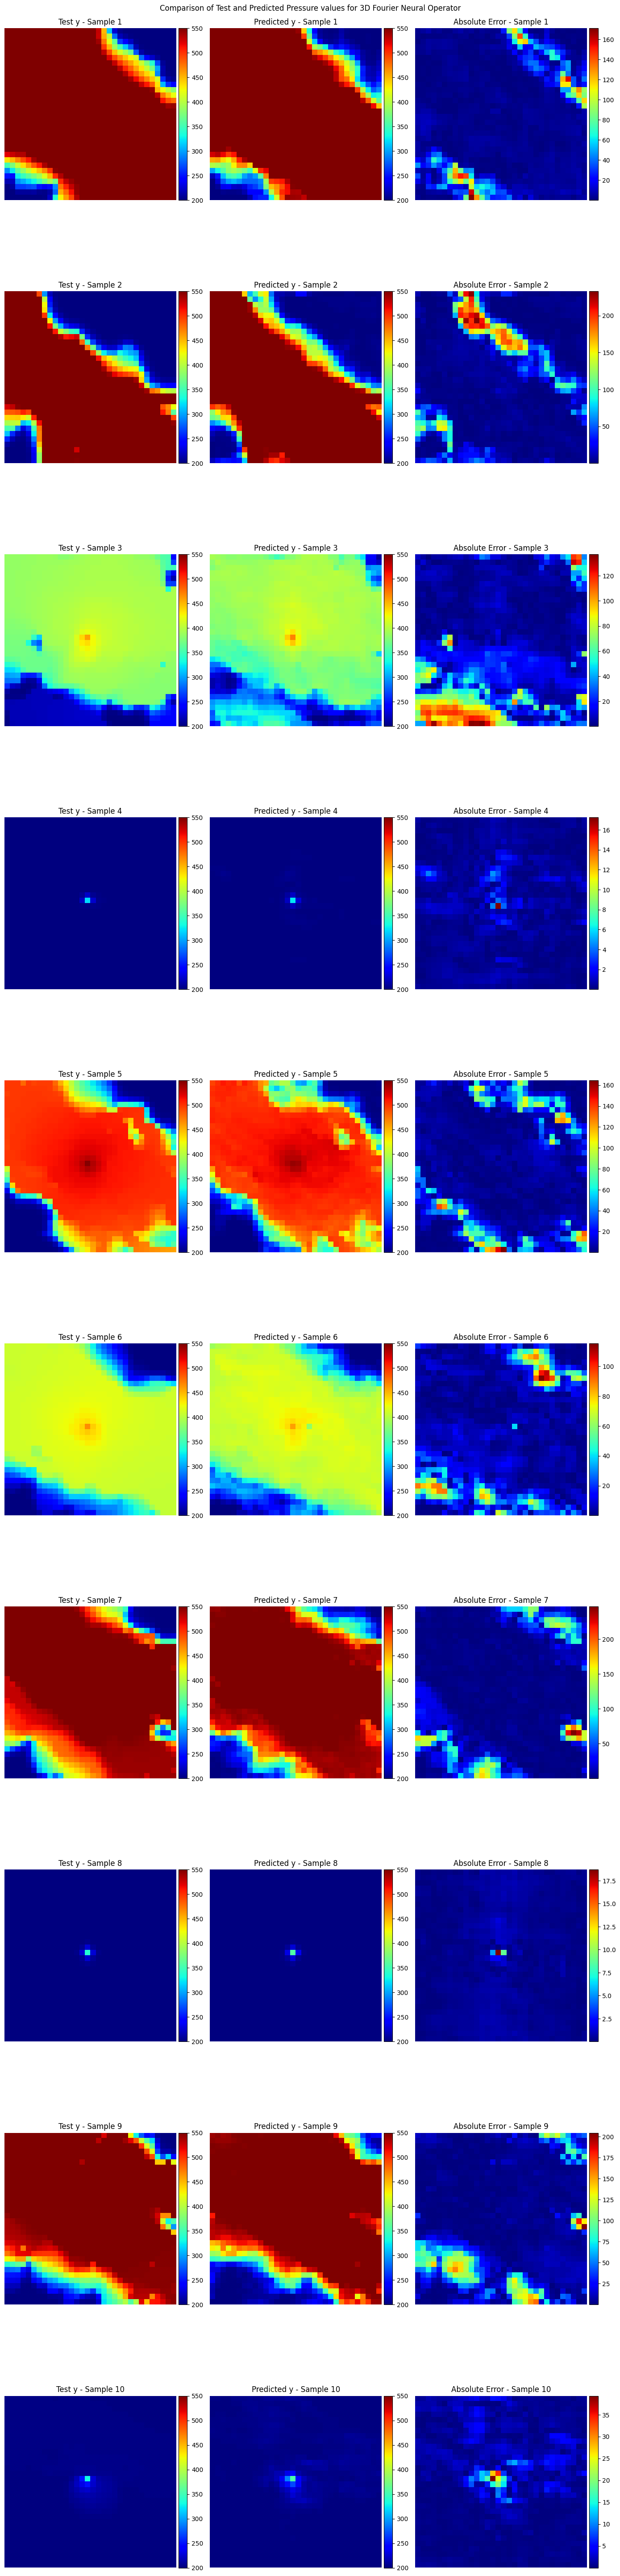

In [35]:
num_samples = 10  # Number of samples to iterate over

fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(14, 6*num_samples))

# Initialize color normalizer
vmin, vmax = 200.0, 550.0 # Define your min and max here
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
        # Assuming the tensor shapes are torch.Size([1, 30, 32, 32, 1]) and torch.Size([1, 61, 32, 32, 1])
        test_y_shape = (1, 61, 32, 32, 1)
        predicted_y_shape = (1, 61, 32, 32, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y and predicted y in the corresponding subplot
        img1 = axes[index, 0].imshow(test_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img2 = axes[index, 1].imshow(predicted_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img3 = axes[index, 2].imshow(np.abs(test_y[0, -1, :, :, 0] - predicted_y[0, -1, :, :, 0]), cmap='jet')

        for img, ax in zip([img1, img2], axes[index][:2]):
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(img, cax=cax, orientation='vertical')
            
        # Adding separate colorbar for the third column
        divider = make_axes_locatable(axes[index][2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img3, cax=cax, orientation='vertical')

        axes[index, 0].set_title(f'Test y - Sample {index+1}')
        axes[index, 1].set_title(f'Predicted y - Sample {index+1}')
        axes[index, 2].set_title(f'Absolute Error - Sample {index+1}')

        # Removing the axis labels
        for ax in axes[index]:
            ax.axis('off')

# Adding a title for the entire figure
fig.suptitle('Comparison of Test and Predicted Pressure values for 3D Fourier Neural Operator')

plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep300_m12_w128_INPUT_Por_Perm_gasrate_OUTPUT_Pressure.png')

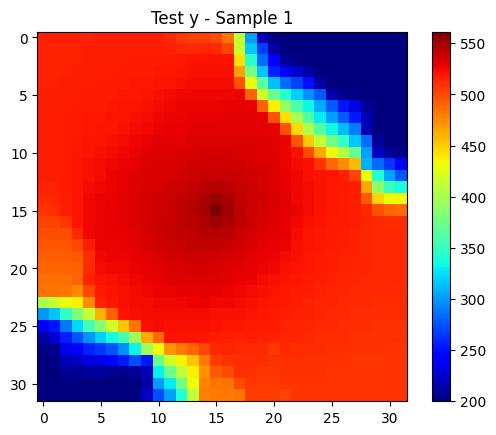

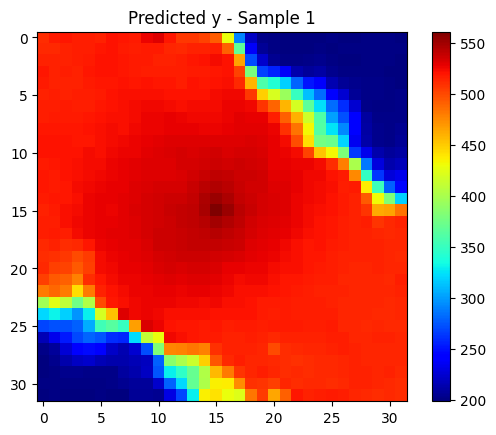

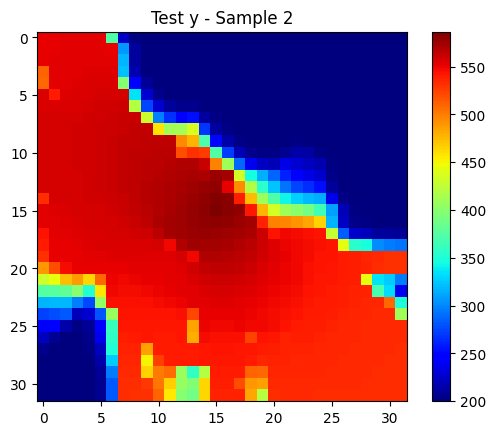

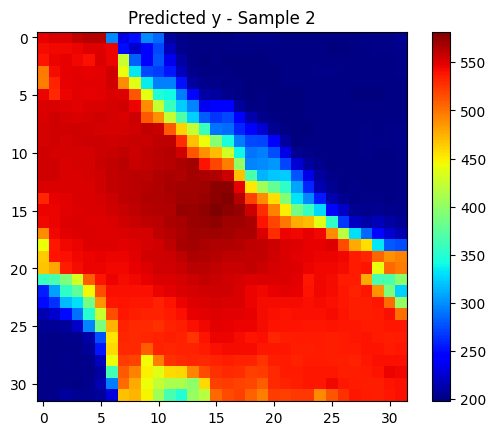

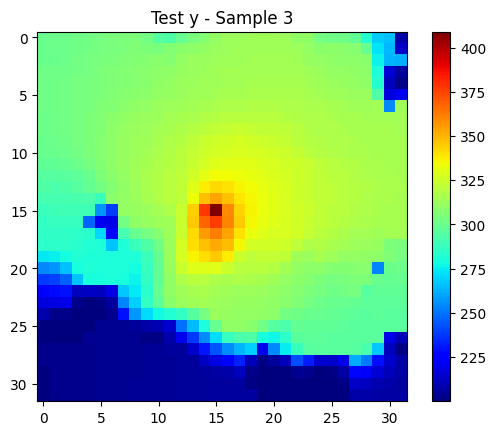

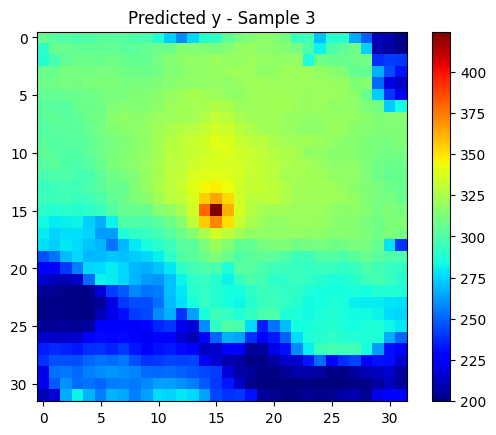

In [22]:
num_samples = 3  # Number of samples to iterate over

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
        # Assuming the tensor shapes are torch.Size([1, 30, 32, 32, 1]) and torch.Size([1, 61, 32, 32, 1])
        test_y_shape = (1, 61, 32, 32, 1)
        predicted_y_shape = (1, 61, 32, 32, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y
        plt.figure()
        plt.imshow(test_y[0, 30, :, :, 0], cmap='jet')
        plt.colorbar()
        plt.title(f'Test y - Sample {index+1}')
        plt.show()

        # Plotting the predicted y
        plt.figure()
        plt.imshow(predicted_y[0, 30, :, :, 0], cmap='jet')
        plt.colorbar()
        plt.title(f'Predicted y - Sample {index+1}')
        plt.show()

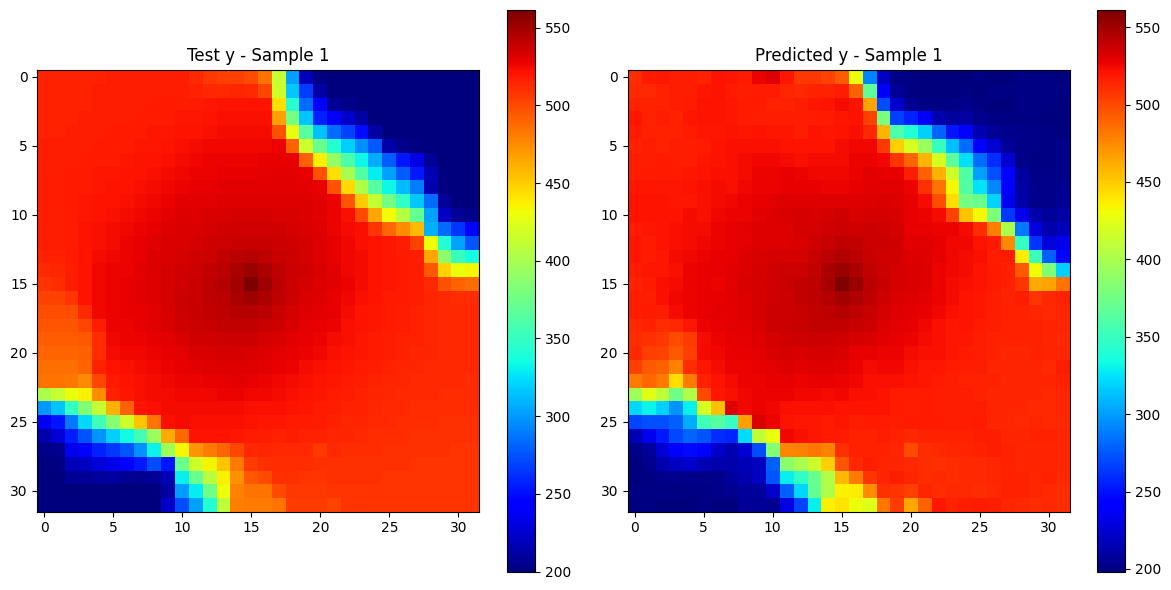

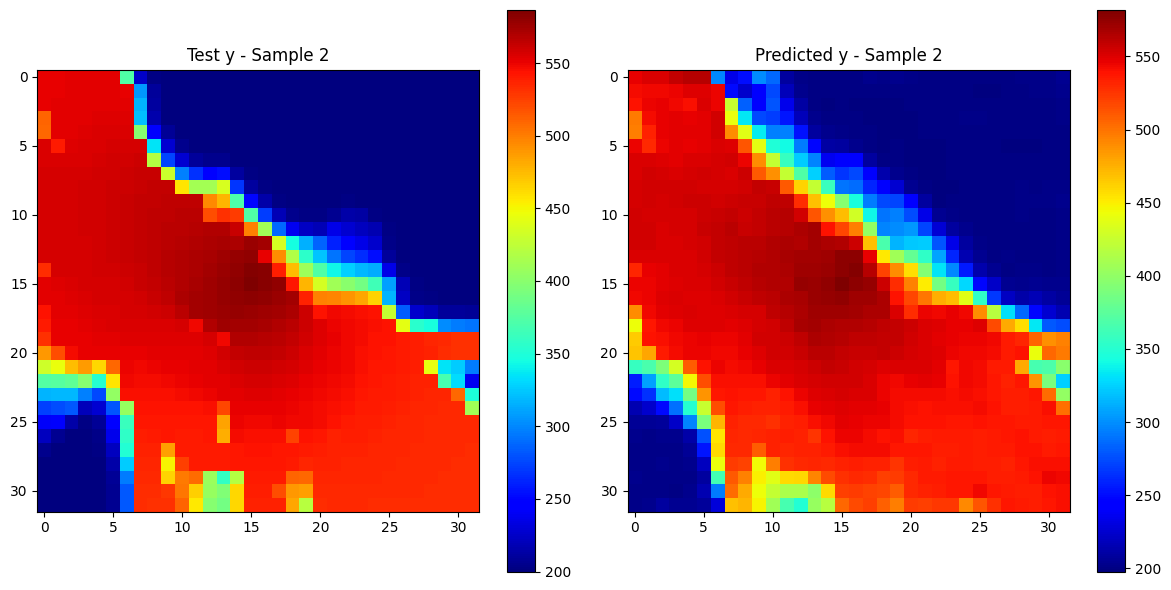

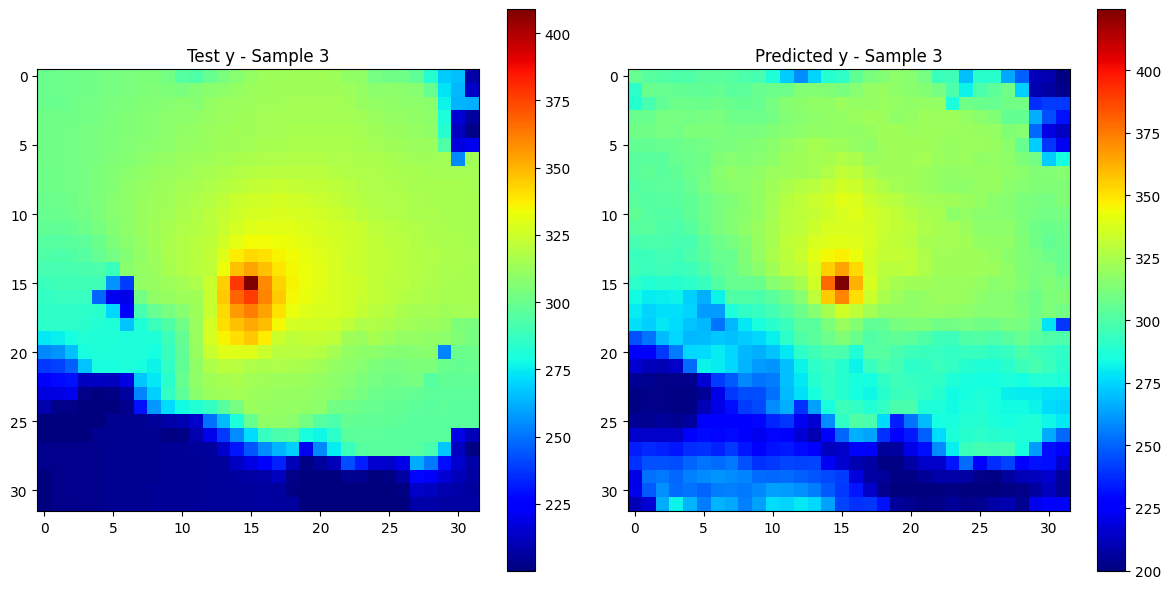

In [30]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 3  # Number of samples to iterate over

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
        # Assuming the tensor shapes are torch.Size([1, 30, 32, 32, 1]) and torch.Size([1, 61, 32, 32, 1])
        test_y_shape = (1, 61, 32, 32, 1)
        predicted_y_shape = (1, 61, 32, 32, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y and predicted y in a single figure
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(test_y[0, 30, :, :, 0], cmap='jet')
        plt.colorbar()
        plt.title(f'Test y - Sample {index+1}')

        plt.subplot(1, 2, 2)
        plt.imshow(predicted_y[0, 30, :, :, 0], cmap='jet')
        plt.colorbar()
        plt.title(f'Predicted y - Sample {index+1}')

        plt.tight_layout()
        plt.show()


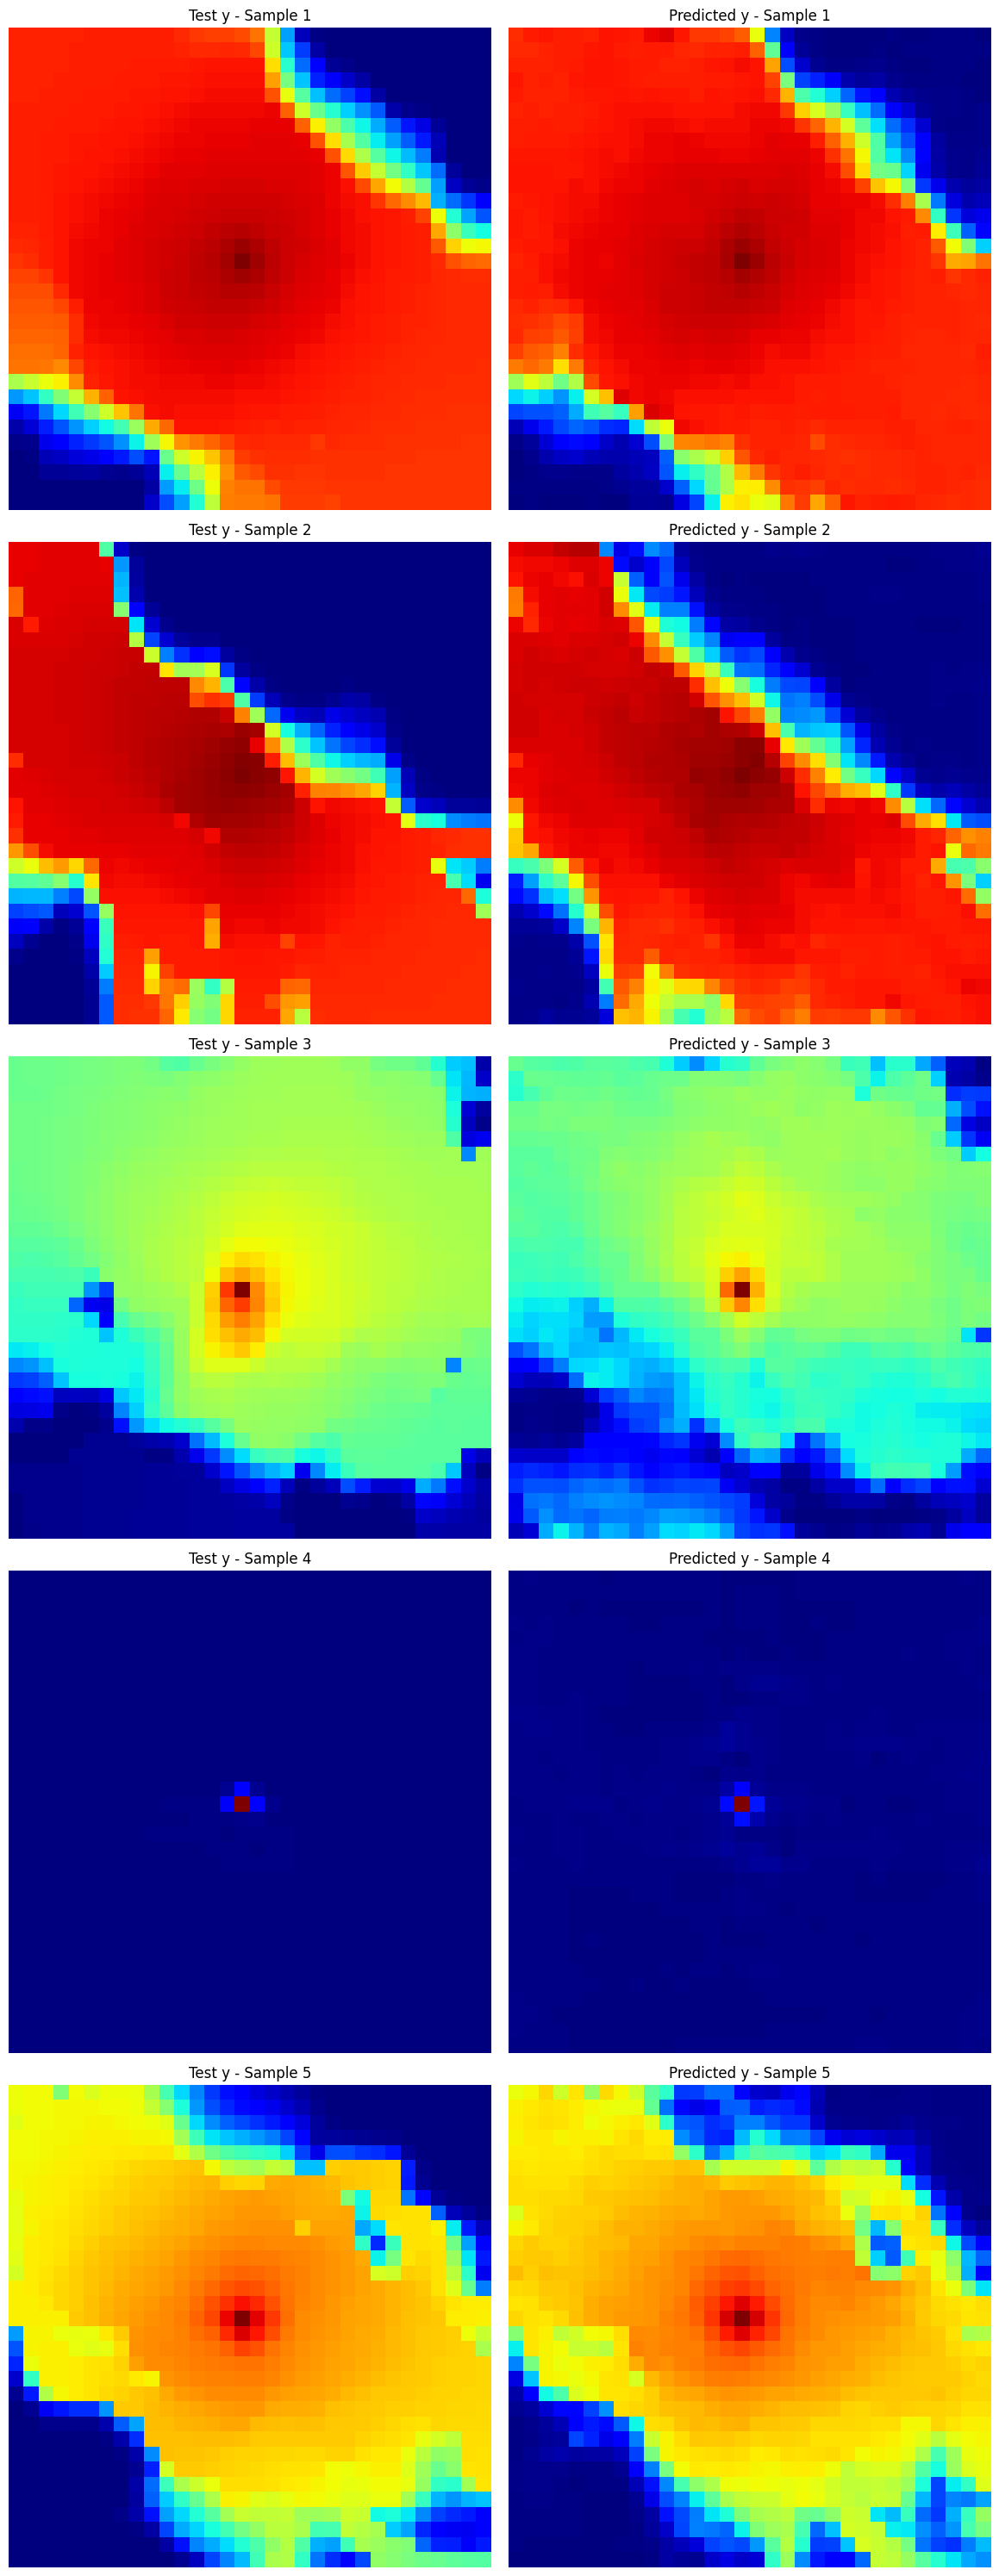

In [31]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 5  # Number of samples to iterate over

fig, axes = plt.subplots(nrows=num_samples, ncols=2, figsize=(12, 6*num_samples))

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
        # Assuming the tensor shapes are torch.Size([1, 30, 32, 32, 1]) and torch.Size([1, 61, 32, 32, 1])
        test_y_shape = (1, 61, 32, 32, 1)
        predicted_y_shape = (1, 61, 32, 32, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y and predicted y in the corresponding subplot
        axes[index, 0].imshow(test_y[0, 30, :, :, 0], cmap='jet')
        axes[index, 0].set_title(f'Test y - Sample {index+1}')
        axes[index, 0].axis('off')

        axes[index, 1].imshow(predicted_y[0, 30, :, :, 0], cmap='jet')
        axes[index, 1].set_title(f'Predicted y - Sample {index+1}')
        axes[index, 1].axis('off')

plt.tight_layout()
plt.show()

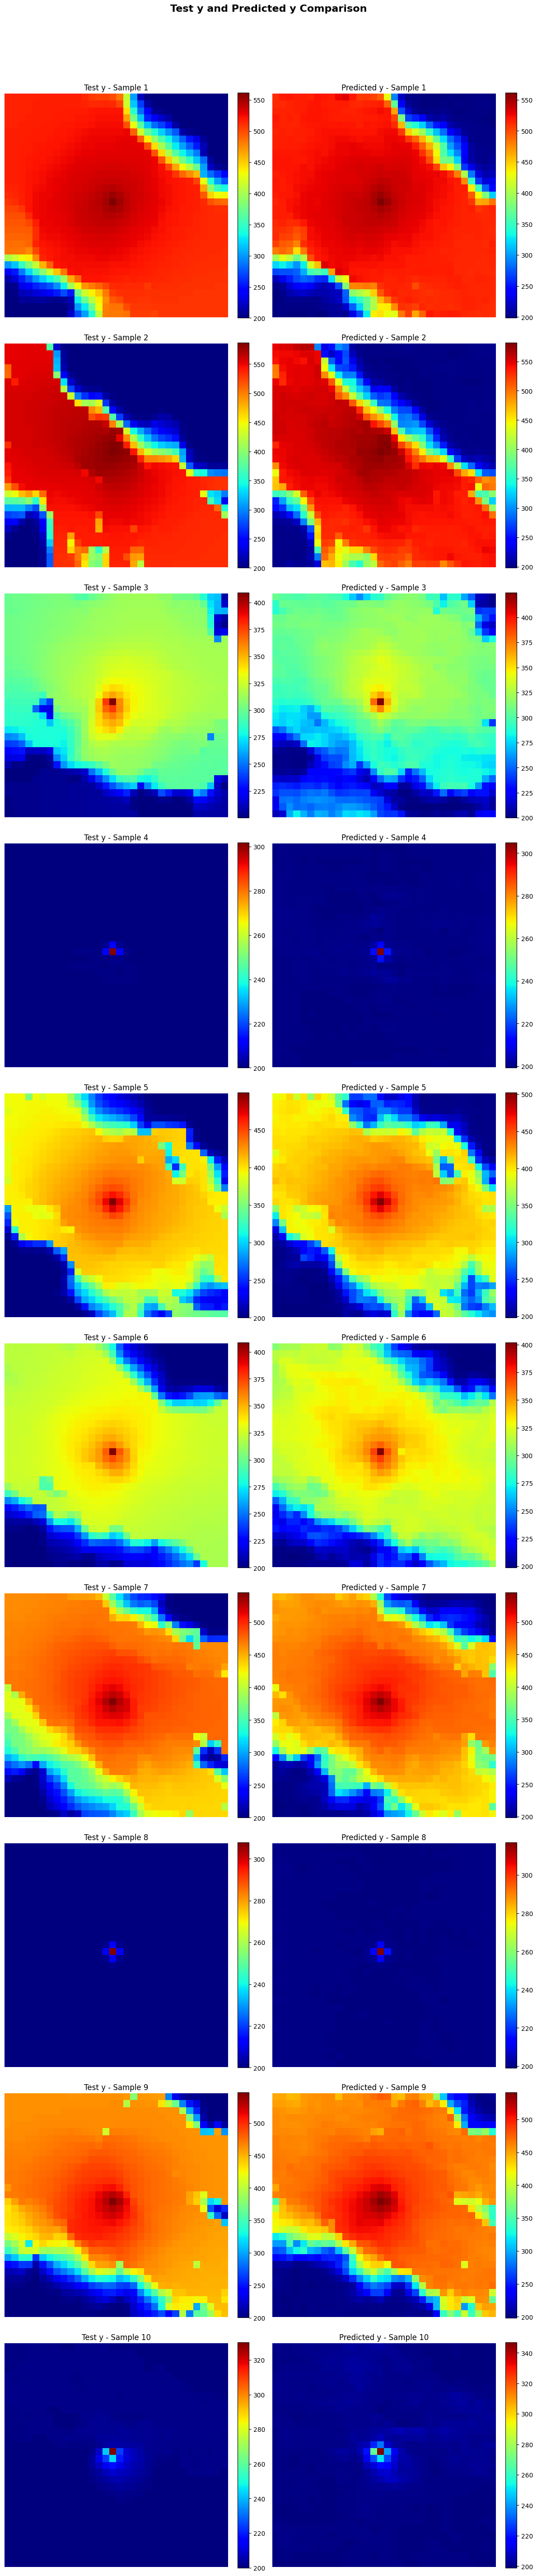

In [33]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 10  # Number of samples to iterate over

fig, axes = plt.subplots(nrows=num_samples, ncols=2, figsize=(12, 6*num_samples))

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
        # Assuming the tensor shapes are torch.Size([1, 30, 32, 32, 1]) and torch.Size([1, 61, 32, 32, 1])
        test_y_shape = (1, 61, 32, 32, 1)
        predicted_y_shape = (1, 61, 32, 32, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y and predicted y in the corresponding subplot
        im1 = axes[index, 0].imshow(test_y[0, 30, :, :, 0], cmap='jet')
        axes[index, 0].set_title(f'Test y - Sample {index+1}')
        axes[index, 0].axis('off')
        fig.colorbar(im1, ax=axes[index, 0], fraction=0.046, pad=0.04)

        im2 = axes[index, 1].imshow(predicted_y[0, 30, :, :, 0], cmap='jet')
        axes[index, 1].set_title(f'Predicted y - Sample {index+1}')
        axes[index, 1].axis('off')
        fig.colorbar(im2, ax=axes[index, 1], fraction=0.046, pad=0.04)

plt.suptitle('Test y and Predicted y Comparison', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [25]:
resolution = 32
folder = f'/scratch/smrserraoseabr/Projects/FluvialCO2/results{resolution}/'
input_vars = ['Por', 'Perm', 'gas_rate'] # Porosity, Permeability, ,  Well 'gas_rate', Pressure + x, y, time encodings 
output_vars = ['Pressure']
device = 'cpu'
num_files= 100
traintest_split = 0.8
dataset = ReadXarrayDataset(folder=folder, input_vars=input_vars, output_vars=output_vars, num_files = num_files, traintest_split = traintest_split)



# Get input and output data tensors
train_a = dataset.train_data_input
train_u = dataset.train_data_output

test_a = dataset.test_data_input
test_u = dataset.test_data_output

# Move data tensors to GPU if available
train_a = train_a.to(device)
train_u = train_u.to(device)

test_a = test_a.to(device)
test_u = test_u.to(device)

# Normalize input_data and output_data
a_normalizer = UnitGaussianNormalizer(train_a)
train_a= a_normalizer.encode(train_a)
test_a = a_normalizer.encode(test_a)

y_normalizer = UnitGaussianNormalizer(train_u)
train_u = y_normalizer.encode(train_u)
test_u = y_normalizer.encode(test_u)

#print shapes of normalized input and output data tensors
print("Train input data shape:", train_a.shape)
print("Train output data shape:", train_u.shape)
print("Test input data shape:", test_a.shape)
print("Test output data shape:", test_u.shape)

Train input data shape: torch.Size([80, 61, 32, 32, 6])
Train output data shape: torch.Size([80, 61, 32, 32, 1])
Test input data shape: torch.Size([20, 61, 32, 32, 6])
Test output data shape: torch.Size([20, 61, 32, 32, 1])


In [26]:
#modes = 12
#width = 128
path_model = '/scratch/smrserraoseabr/Projects/NO-DA/model_INPUT_POR_PERM_QG_OUTPUT_Pressure/ns_fourier_3d_N800.0_ep500_m12_w128'

#model = FNO3d(modes, modes, modes, width).to(device)

model = torch.load(path_model)
model.eval()  # If you're doing evaluation

FNO3d(
  (p): Linear(in_features=6, out_features=128, bias=True)
  (conv0): SpectralConv3d()
  (conv1): SpectralConv3d()
  (conv2): SpectralConv3d()
  (conv3): SpectralConv3d()
  (mlp0): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp1): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp2): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (mlp3): MLP(
    (mlp1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (mlp2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  )
  (w0): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (w1): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (w2): Conv3d(128, 128, kernel_size=(1, 1, 1), stride=

In [27]:
pred = torch.zeros(test_u.shape)
index = 0
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_a, test_u), batch_size=1, shuffle=False)

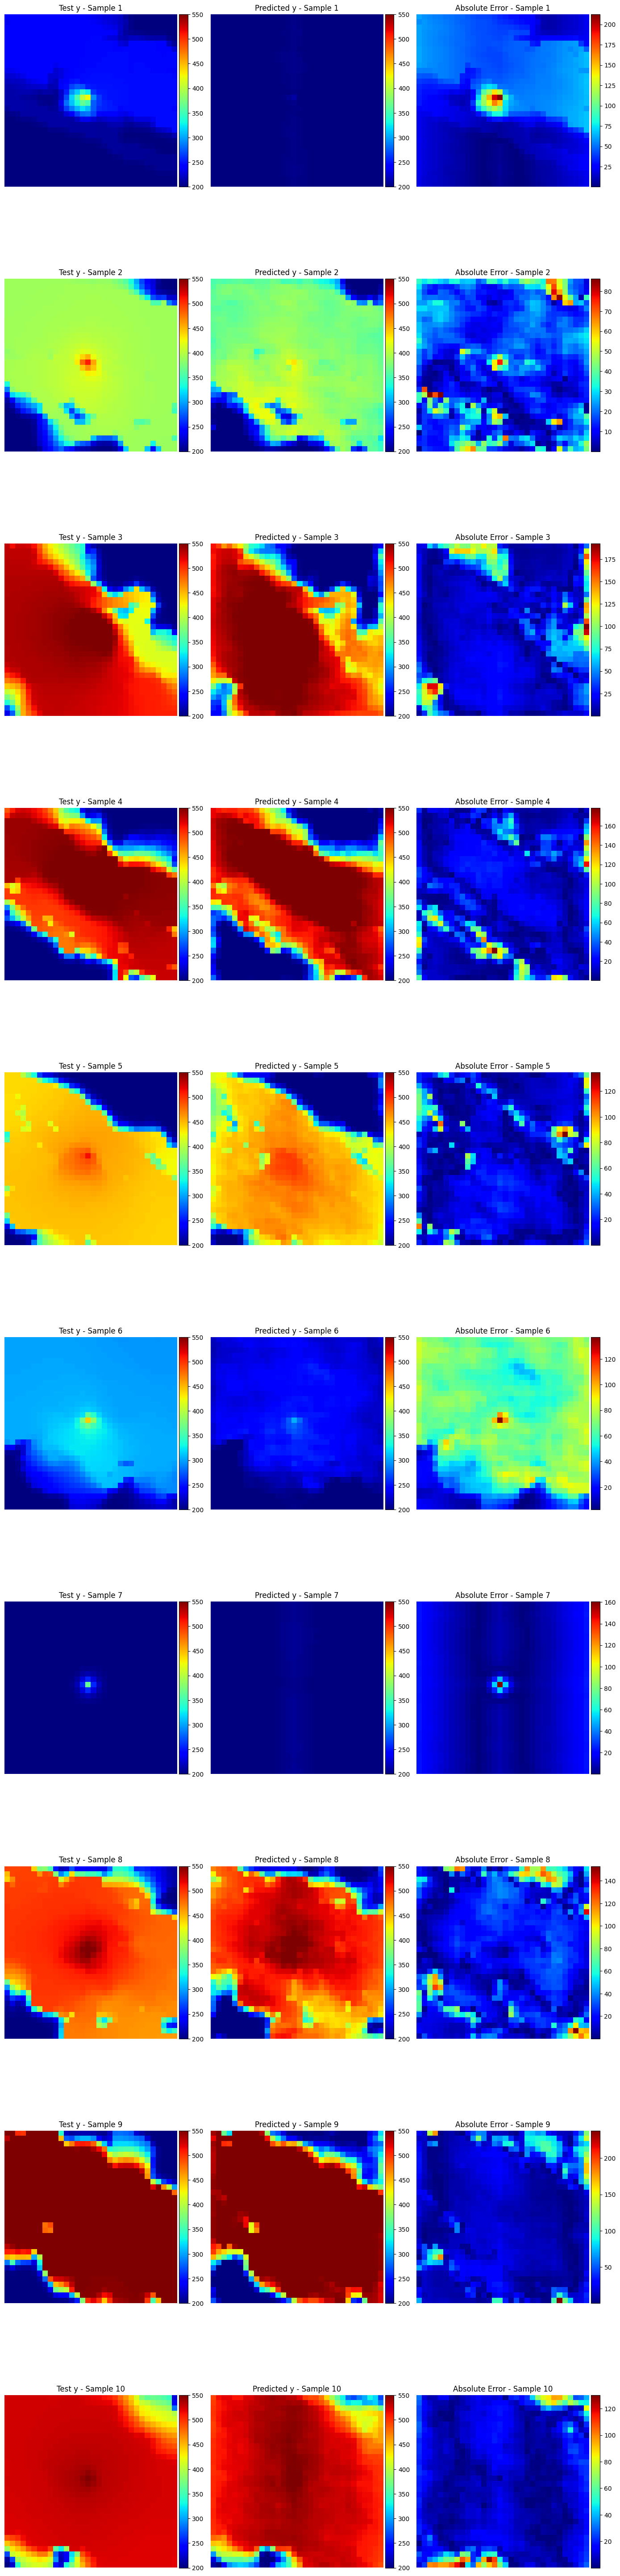

In [28]:
import matplotlib as mpl
num_samples = 10  # Number of samples to iterate over

fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(14, 6*num_samples))
plt.title('Comparison of Test and Predicted values for 3D Fourier Neural Operator')

# Initialize color normalizer
vmin, vmax = 200.0, 550.0 # Define your min and max here
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
       
        test_y_shape = (1, 61,resolution, resolution, 1)
        predicted_y_shape = (1, 61, resolution, resolution, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Plotting the test y and predicted y in the corresponding subplot
        img1 = axes[index, 0].imshow(test_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img2 = axes[index, 1].imshow(predicted_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img3 = axes[index, 2].imshow(np.abs(test_y[0, -1, :, :, 0] - predicted_y[0, -1, :, :, 0]), cmap='jet')

                # Adding contour lines to the images
        #axes[index, 0].contour(test_y[0, -1, :, :, 0], colors='k', linewidths=0.5)
        #axes[index, 1].contour(predicted_y[0, -1, :, :, 0], colors='k', linewidths=0.5)
        




        for img, ax in zip([img1, img2], axes[index][:2]):
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(img, cax=cax, orientation='vertical')
            
        # Adding separate colorbar for the third column
        divider = make_axes_locatable(axes[index][2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img3, cax=cax, orientation='vertical')

        axes[index, 0].set_title(f'Test y - Sample {index+1}')
        axes[index, 1].set_title(f'Predicted y - Sample {index+1}')
        axes[index, 2].set_title(f'Absolute Error - Sample {index+1}')

        # Removing the axis labels
        for ax in axes[index]:
            ax.axis('off')

# Adding a title for the entire figure


plt.tight_layout()
plt.show()

# Save the figure
#fig.savefig('/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep300_m12_w128_INPUT_Por_Perm_gasrate_OUTPUT_Pressure.png')

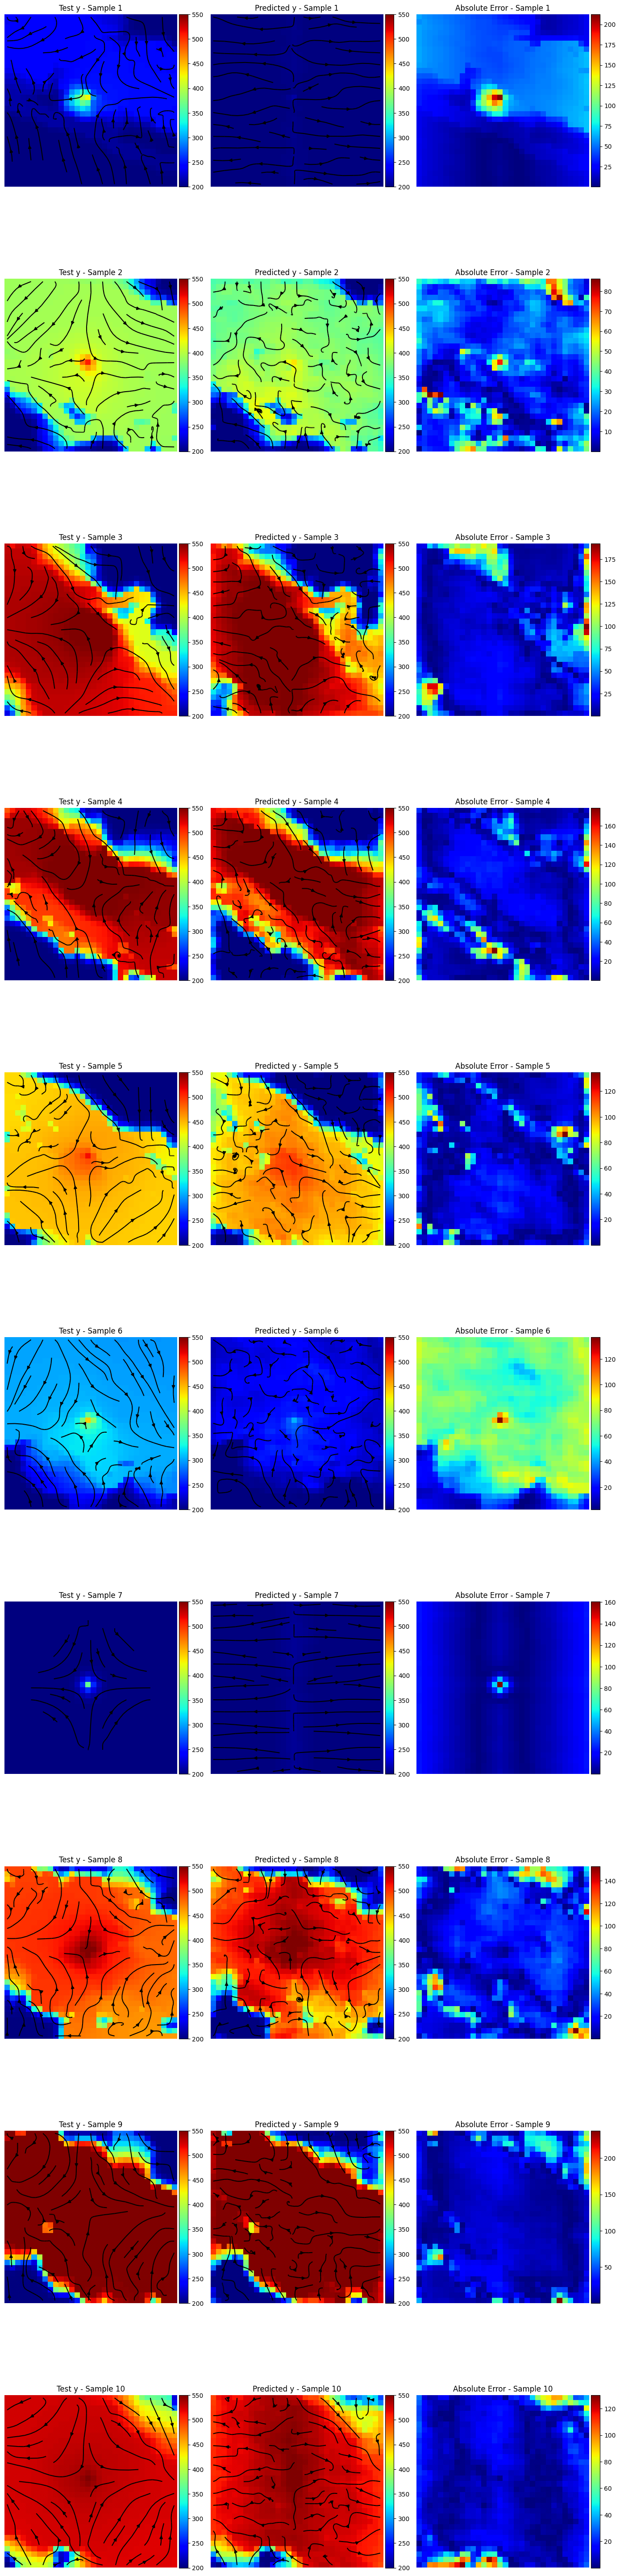

In [29]:
num_samples = 10  # Number of samples to iterate over

fig, axes = plt.subplots(nrows=num_samples, ncols=3, figsize=(14, 6*num_samples))
plt.title(f'Comparison of Test and Predicted values for 3D Fourier Neural Operator - resolution {resolution}', fontsize=16, fontweight='bold')

# Initialize color normalizer
vmin, vmax = 200.0, 550.0 # Define your min and max here
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

with torch.no_grad():
    for index, (x, y) in enumerate(test_loader):
        if index >= num_samples:
            break
        
        x = x.to(device)
        y = y.to(device)

        out = model(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)
        
       
        test_y_shape = (1, 61,resolution, resolution, 1)
        predicted_y_shape = (1, 61, resolution, resolution, 1)
        
        test_y = y.view(test_y_shape).cpu().numpy()
        predicted_y = out.view(predicted_y_shape).cpu().numpy()

        # Compute gradients
        grad_test_y = np.gradient(test_y[0, -1, :, :, 0])
        grad_predicted_y = np.gradient(predicted_y[0, -1, :, :, 0])
        grad_abs_difference = np.gradient(np.abs(test_y[0, -1, :, :, 0] - predicted_y[0, -1, :, :, 0]))

        # Plotting the test y and predicted y in the corresponding subplot
        img1 = axes[index, 0].imshow(test_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img2 = axes[index, 1].imshow(predicted_y[0, -1, :, :, 0], cmap='jet', norm=norm)
        img3 = axes[index, 2].imshow(np.abs(test_y[0, -1, :, :, 0] - predicted_y[0, -1, :, :, 0]), cmap='jet')

        # Adding streamlines to the images
        X, Y = np.meshgrid(np.arange(test_y[0, -1, :, :, 0].shape[1]), np.arange(test_y[0, -1, :, :, 0].shape[0]))
        stream_density = 0.5
        axes[index, 0].streamplot(X, Y, -grad_test_y[1], grad_test_y[0], color='k', density=stream_density)
        axes[index, 1].streamplot(X, Y, -grad_predicted_y[1], grad_predicted_y[0], color='k', density=stream_density)
        #axes[index, 2].streamplot(X, Y, -grad_abs_difference[1], grad_abs_difference[0], color='k', density=stream_density)

        for img, ax in zip([img1, img2], axes[index][:2]):
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            fig.colorbar(img, cax=cax, orientation='vertical')
            
        # Adding separate colorbar for the third column
        divider = make_axes_locatable(axes[index][2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(img3, cax=cax, orientation='vertical')

        axes[index, 0].set_title(f'Test y - Sample {index+1}')
        axes[index, 1].set_title(f'Predicted y - Sample {index+1}')
        axes[index, 2].set_title(f'Absolute Error - Sample {index+1}')

        # Removing the axis labels
        for ax in axes[index]:
            ax.axis('off')


plt.tight_layout()
plt.show()

# Save the figure
#fig.savefig('/scratch/smrserraoseabr/Projects/NO-DA/results/ns_fourier_3d_N800.0_ep300_m12_w128_INPUT_Por_Perm_gasrate_OUTPUT_Pressure.png')
